In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import sys
sys.path.append('../src')
# plt.style.use('dark_background')
import data
from viz import *
import itertools
from sklearn import mixture
from matplotlib_venn import venn3
import viz
outcome_def = 'y_consec_thresh'

Matplotlib is building the font cache; this may take a moment.


# process original data

In [8]:
dset_orig = 'clath_aux+gak_a7d2'
df_orig = data.get_data(dset=dset_orig)  # save out orig

# process new data

In [ ]:
# process new data (using lifetime thresholds from original data)
outcome_def = 'y_consec_sig'
dfs = []
for dset in ['clath_aux_dynamin']:
# for dset in config.DSETS.keys(): #['clath_aux+gak']: #
    df = data.get_data(dset=dset, previous_meta_file=None, use_processed=False)
    # df = get_data(dset=dset, previous_meta_file=f'{config.DIR_PROCESSED}/metadata_{dset_orig}.pkl')
    print(dset, 'num cells', len(df['cell_num'].unique()), 'num tracks', df.shape[0], 'num aux+',
          df[outcome_def].sum(), 'aux+ fraction', (df[outcome_def].sum() / df.shape[0]).round(3),
          'valid', df.valid.sum(), 'valid aux+', df[df.valid][outcome_def].sum(), 'valid aux+ fraction',
          (df[df.valid][outcome_def].sum() / df.valid.sum()).round(3))
    dfs.append(df)

# visualize differences

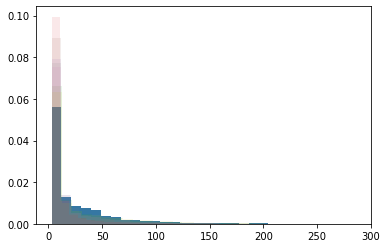

In [19]:
plt.hist(df_orig.lifetime, alpha=1, density=True, bins=30)
for df in dfs:
    plt.hist(df.lifetime, density=True, bins=30, alpha=0.1)